<a href="https://colab.research.google.com/github/pathilink/alura_time_series/blob/main/notebook/5_alucel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alucel - Sales

## Libraries

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline 
from matplotlib import pyplot as plt

## Data

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_mobile = pd.read_csv("drive/MyDrive/Alura/Time Series/alucel.csv")
df_mobile.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [4]:
df_mobile.rename(columns={'dia': 'day', 'vendas': 'sales'}, inplace=True)

In [5]:
print(f'Shape: {df_mobile.shape[0]} rows and {df_mobile.shape[1]} columns.\n')

print('Number of null data:', df_mobile.isna().sum().sum(), '\n')

print('Variable types:') 
df_mobile.dtypes

Shape: 61 rows and 2 columns.

Number of null data: 0 

Variable types:


day       object
sales    float64
dtype: object

In [6]:
df_mobile['day'] = pd.to_datetime(df_mobile['day'])
df_mobile.dtypes

day      datetime64[ns]
sales           float64
dtype: object

## Decomposing

In [7]:
df_mobile['increase'] = df_mobile['sales'].diff()
df_mobile['acceleration'] = df_mobile['increase'].diff()
df_mobile.head()

,day,sales,increase,acceleration
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


In [8]:
def plot_comparison(x, y1, y2, y3, dataset, title1, title2, title3):
  plt.figure(figsize=(16, 16))
  sns.set_palette('Accent')
  sns.set_style('darkgrid')

  ax1 = plt.subplot(3, 1, 1) # (number of graphs, number of parts, order of graphs)
  ax1.set_title(title1, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  
  ax2 = plt.subplot(3, 1, 2)
  ax2.set_title(title2, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y2, data=dataset)


  ax3 = plt.subplot(3, 1, 3)
  ax3.set_title(title3, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y3, data=dataset)

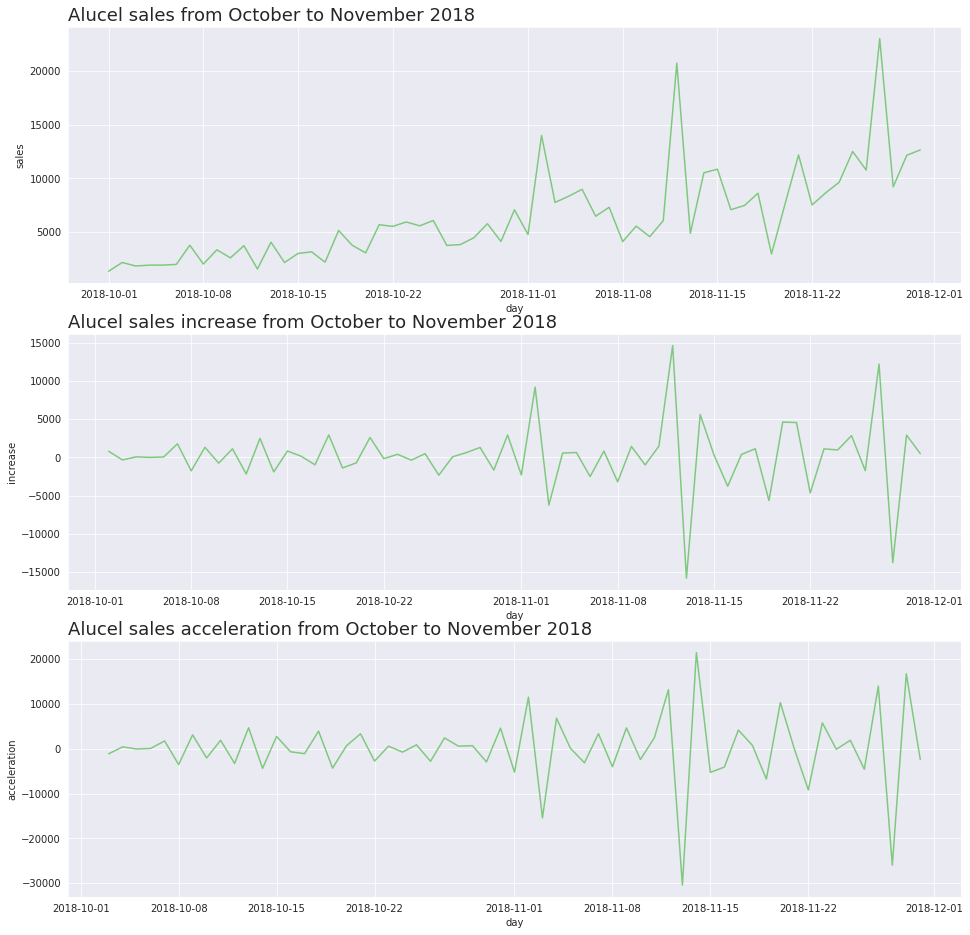

In [9]:
plot_comparison(
    'day', 
    'sales', 
    'increase', 
    'acceleration', 
    df_mobile, 
    'Alucel sales from October to November 2018',
    'Alucel sales increase from October to November 2018',
    'Alucel sales acceleration from October to November 2018'
    )

## Moving average

In [10]:
# Average for 7 days to normalize data

df_mobile['moving_average_7'] = df_mobile['sales'].rolling(7).mean()  

In [11]:
df_mobile.head(7)

,day,sales,increase,acceleration,moving_average_7
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


In [12]:
def plot_function(title, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=df_mobile)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(title, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

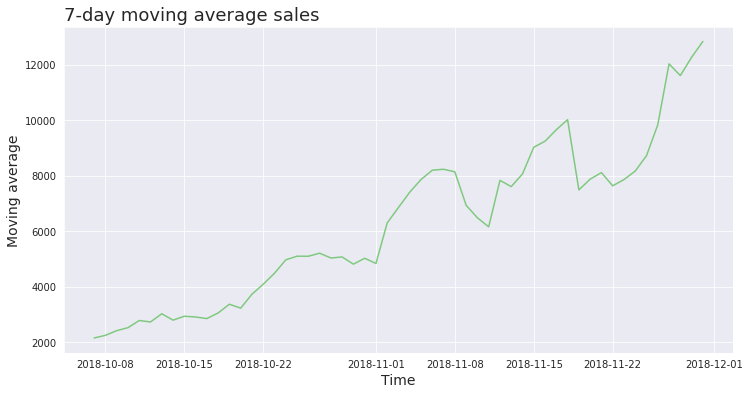

In [13]:
plot_function(
    '7-day moving average sales',
    'Time', 'Moving average',
    'day', 'moving_average_7',
    df_mobile

)

In [14]:
# Average for 21 days 

df_mobile['moving_average_21'] = df_mobile['sales'].rolling(21).mean()  

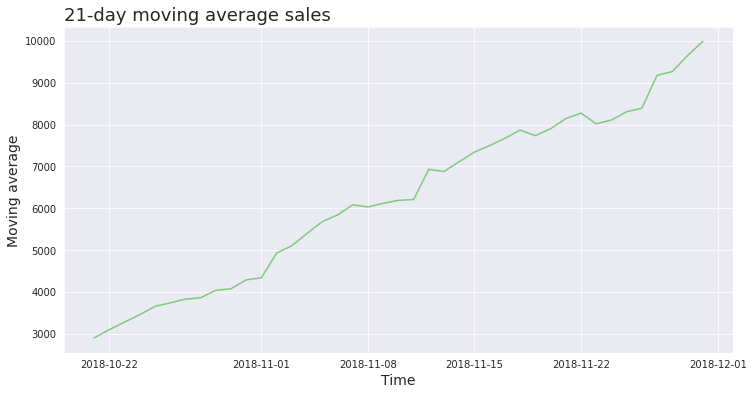

In [15]:
plot_function(
    '21-day moving average sales',
    'Time', 'Moving average',
    'day', 'moving_average_21',
    df_mobile

) # loses information with too many days

In [16]:
def plot_comparison(x, y1, y2, y3, dataset, title1, title2, title3):
  plt.figure(figsize=(16, 16))
  sns.set_palette('Accent')
  sns.set_style('darkgrid')

  ax1 = plt.subplot(3, 1, 1) # (number of graphs, number of parts, order of graphs)
  ax1.set_title(title1, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  
  ax2 = plt.subplot(3, 1, 2)
  ax2.set_title(title2, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y2, data=dataset)


  ax3 = plt.subplot(3, 1, 3)
  ax3.set_title(title3, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y3, data=dataset)

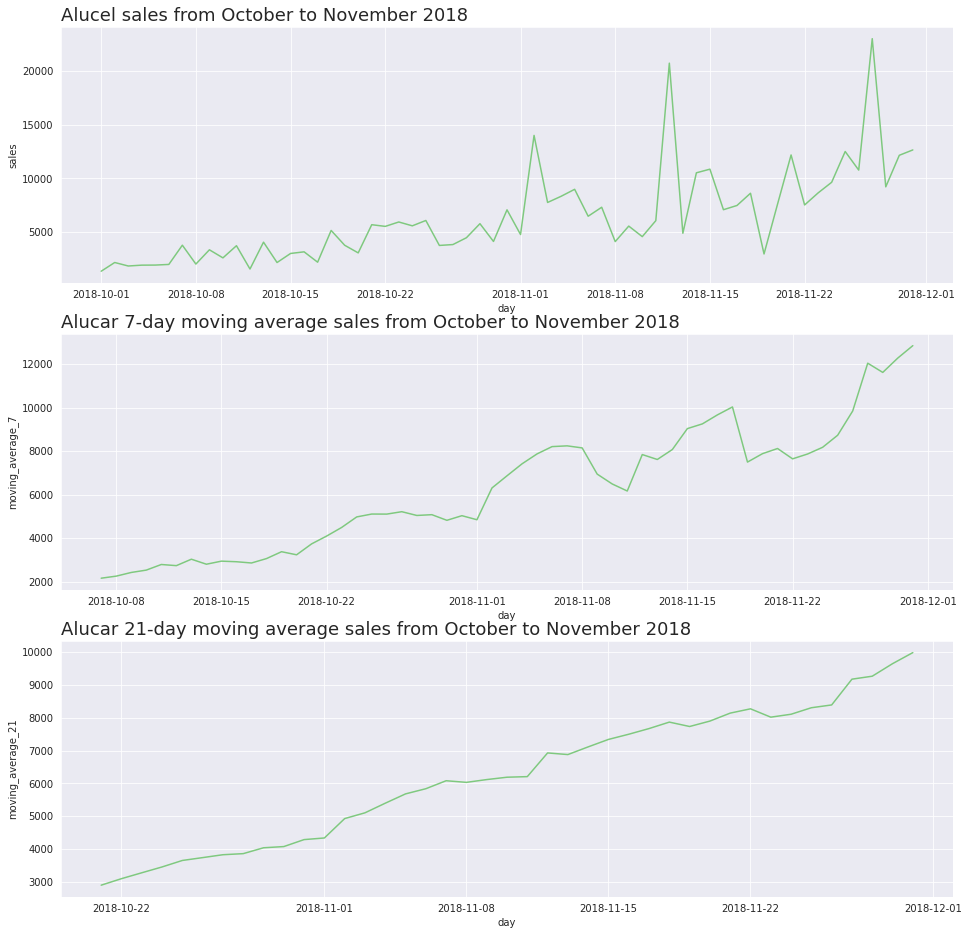

In [17]:
plot_comparison(
    'day', 
    'sales', 'moving_average_7', 'moving_average_21', 
    df_mobile, 
    'Alucel sales from October to November 2018',
    'Alucar 7-day moving average sales from October to November 2018',
    'Alucar 21-day moving average sales from October to November 2018'
    )